In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
# from bnlp.tokenizer.basic import BasicTokenizer
import joblib
import os

warnings.filterwarnings("ignore")

# Load data
df = pd.read_excel('/content/suspicious Bangla text.xlsx')  # Replace with your dataset file

df.head(60)

,Text,binary_label
0,১ থেকে ১০০ এর মধ্যে আপনার প্রিয় নম্বর কি? এর উ...,0
1,ওএমজি ওএমজি ওএমজি হ্যাঁ হ্যাঁ এটি ... এটি নিখু...,0
2,এই ছুটির দিনটি একটি বোর্ডে পেরেক করা একজনকে উদ...,1
3,সেই রাজাকার বাহিনী আর জঙ্গী বাহিনী বঙ্গবন্ধু ক...,1
4,হ্যাঁ আমি বালিশগুলি লাইভ জার্নাল জারক রোটেশনগু...,1
5,বিরক্ত না করতে পারাও একটা বিরক্তিকর ব্যাপার!,0
6,একে শিট্টি গাধা ফাক ছিটে স্যার বলা হয়,1
7,রাজাকারের সন্তানরা এটাই প্রমান যে আল্লা পাখ তা...,1
8,বিস্ময়কর পয়েন্টটি ব্যবহার করে আমার আপত্তি নে...,0
9,গত বছর নিউজিল্যান্ডের ক্রাইস্টচার্চের একটি মসজ...,0


In [ ]:
df['Text'][59]

'অবশ্যই সঠিক! আপনি যদি তাদের কাছ থেকে বিনামূল্যে ছিটেফোঁটা না পেতে পারেন তবে ব্যবসায়ে বন্ধুবান্ধব থাকার কী লাভ?'

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Text            0
binary_label    0
dtype: int64


In [ ]:
df.rename(columns={'Text': 'Bangla Text', 'binary_label': 'Detect'}, inplace=True)


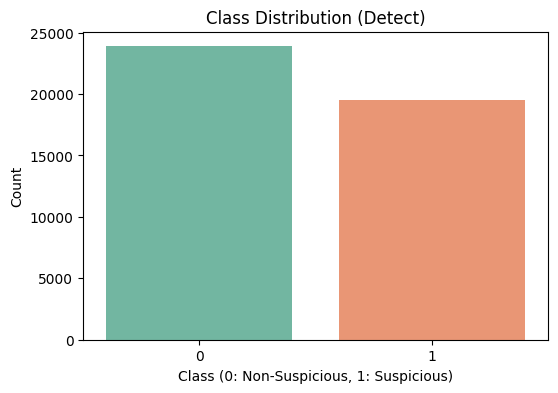


Class Percentages:
Detect
0    55.023163
1    44.976837
Name: count, dtype: float64


In [ ]:
# Visualize class balance
plt.figure(figsize=(6, 4))
sns.countplot(x='Detect', data=df, palette='Set2')
plt.title('Class Distribution (Detect)')
plt.xlabel('Class (0: Non-Suspicious, 1: Suspicious)')
plt.ylabel('Count')
plt.show()

# Calculate class percentages
class_counts = df['Detect'].value_counts()
class_percentages = class_counts / len(df) * 100
print("\nClass Percentages:")
print(class_percentages)

In [ ]:

def preprocess_text(text):
    if isinstance(text, str):  # Ensure text is a string
        text = text.strip()  # Remove leading/trailing whitespace
        text = text.replace("।", "")  # Remove Bengali full stop
    else:
        text = ""  # Replace NaN or float values with an empty string
    return text

# Apply preprocessing
df['Bangla Text'] = df['Bangla Text'].apply(preprocess_text)





In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(df['Bangla Text'], df['Detect'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      4768
           1       0.82      0.79      0.81      3910

    accuracy                           0.83      8678
   macro avg       0.83      0.82      0.83      8678
weighted avg       0.83      0.83      0.83      8678



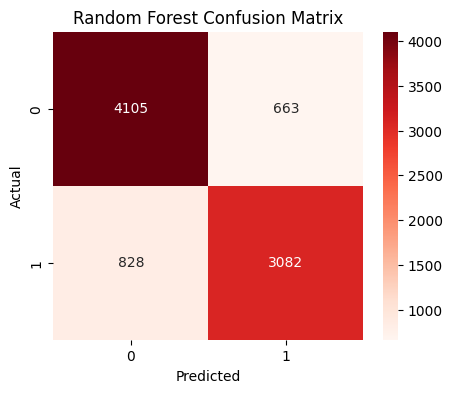

In [ ]:

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Reds')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      4768
           1       0.67      0.70      0.69      3910

    accuracy                           0.71      8678
   macro avg       0.71      0.71      0.71      8678
weighted avg       0.71      0.71      0.71      8678



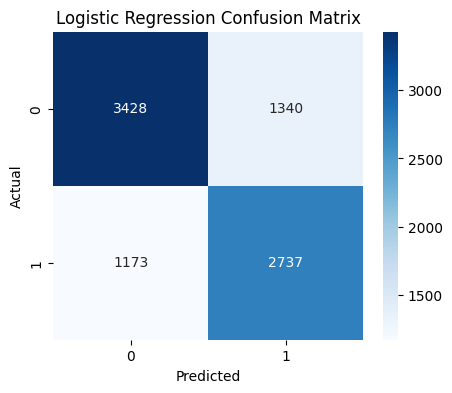

In [ ]:
from sklearn.linear_model import LogisticRegression
# Train Logistic Regression model
lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Naive Bayes Performance:
              precision    recall  f1-score   support

           0       0.70      0.83      0.76      4768
           1       0.73      0.56      0.63      3910

    accuracy                           0.71      8678
   macro avg       0.71      0.69      0.69      8678
weighted avg       0.71      0.71      0.70      8678



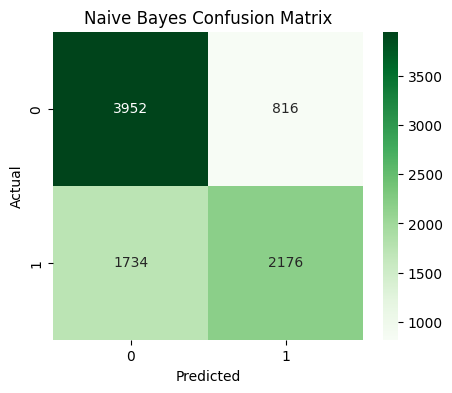

Naive Bayes model saved successfully!


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate the model
print("Naive Bayes Performance:")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Greens')
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Save the model
joblib.dump(nb_model, 'bangla_text_nb.pkl')
print("Naive Bayes model saved successfully!")